# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de GridSearch con el fin de buscar los mejores hiperparámetros de distintos modelos dentro de un rango de valores definidos por nosotros mismos. Igualmente, se busca que usted aplique y comprenda los siguientes modelos:

- Árboles de decisión
- Bosques de decisión
- AdaBoost
- XGBoost
- Bagging

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. La fecha límite de entrega es el día **8 de noviembre** y se realizará a través de Bloque Neón.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import random

Lectura de CSV y borrado de filas incompletas.

In [ ]:
#Colab
#df = pd.read_csv('water_potability.csv').dropna()
path = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/OctavoSemestre/Machine Learning/Trabajos/ML_hw4/ML_hw4/waterPotability/water_potability.csv"
df = pd.read_csv(path).dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

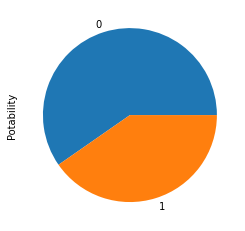

In [ ]:
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

Utilizaremos la función `resample` de SciKit-Learn para remuestrear algunas muestras entre la clase '1'.

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

<AxesSubplot:ylabel='Potability'>

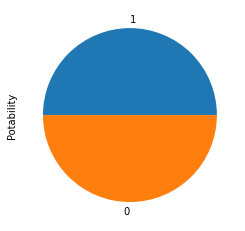

In [ ]:
df['Potability'].value_counts().plot(kind='pie')

In [ ]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']
print(X)
print(y)

             ph    Hardness        Solids  Chloramines     Sulfate  \
769    5.729303  162.857585  34573.678786     5.654856  415.287072   
2749   5.913133  184.393156  40847.760146     7.041828  331.959964   
3130   8.140344  153.748170  50793.898917     7.843498  306.218950   
1845   8.176080  201.553701  21856.988628     5.241047  320.260120   
2349   5.495976  150.534519  18333.632664     7.471728  416.888527   
...         ...         ...           ...          ...         ...   
1655   7.260904  189.077962  21391.162544     6.576866  356.622222   
309   10.041028  113.831112  16266.434445     7.939074  363.866890   
686    8.907987  202.461211  33653.761963     5.431879  330.827133   
2448   6.486153  224.809456  26807.119512     3.267984  319.074358   
2475   4.991397  141.622395  44499.728710     8.260928  335.509830   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
769     297.631365       13.990842        76.744677   3.556395  
2749    563.409970       21.9

## Parte 1: Prueba de Modelos y GridSearch/RandomizedSearch

A continuación, realizaremos un procedimiento de búsqueda del mejor modelo y sus correspondientes hiperparámetros. Estos procedimientos se conocen como GridSearch/RandomizedSearch. Puede encontrar más información en los siguientes enlaces:

- [GridSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)
- [Medium Article: GridSearch & RandomizedSearch](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Partición de datos de prueba/entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state = 22)
# Utilice la función train_test_split #

## Parte 1A

### Definición de Parámetros de GridSearch/RandomizedSearch

Basado en la documentación de las funciones, defina los siguientes parámetros para los casos:

- GridSearch:
    - Árbol de Decisión (GridSearch):
        - 'criterion': 'gini' y 'entropy'
        - 'max_depth': vector de valores enteros entre 1 y 50
        - 'min_samples_leaf': 10 valores seleccionados por usted entre 1 y 100
    
    - Random Forest (GridSearch):
        - 'n_estimators': 4 valores seleccionados por usted entre 100 y 500
        - 'min_samples_leaf': 3 valores seleccionados por usted entre 2 y 30
        
    - AdaBoost (GridSearch):
        - 'n_estimators': 6 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
        
    - XGBoost (RandomizedSearch):
        - 'n_estimators': 8 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
    

In [ ]:

# Búsqueda de Hiperparámetros

lr = LogisticRegression(random_state=42)

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

#Árbol de Decisión
para_dt = {'criterion':["gini","entropy"],'max_depth':[n for n in range(1,51,1)]
           ,'min_samples_leaf':[18,27,54,63,79,11,99,6,33,41]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)

#Random Forest
#n_estimators: número de árboles en el bosque.
params_rf = {'n_estimators':[498,300,120,348],'min_samples_leaf':[9,26,21]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators':[51,90,300,450,575,599],'learning_rate':[random.random() for _ in range(5)]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
params_xgb = {'n_estimators':[51,90,230,300,350,450,575,599],'learning_rate':[random.random() for _ in range(5)]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

### Búsqueda de Hiperparámetros

A continuación se debe realizar el proceso de GridSearch. Esta operación puede tardar.

In [ ]:
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=na...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [ ]:
print("Mejores parámetros Árbol de Decisión:", grid_dt.best_params_)
print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejores parámetros AdaBoost:", grid_ada.best_params_)
print("Mejores parámetros XGBoost:", rs_xgb.best_params_)

Mejores parámetros Árbol de Decisión: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 6}
Mejores parámetros Random Forest: {'min_samples_leaf': 9, 'n_estimators': 498}
Mejores parámetros AdaBoost: {'learning_rate': 0.9657805284631268, 'n_estimators': 599}
Mejores parámetros XGBoost: {'n_estimators': 230, 'learning_rate': 0.3138785140483171}


In [ ]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 6}

## Parte 1B

### Boosting & Bagging

Para este caso utilice 100 clasificadores de Árbol de Decisión con los mejores parámetros obtenidos a partir del GridSearch realizado anteriormente.

In [ ]:
# Boosting & Bagging
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = 'entropy',max_depth=22,min_samples_leaf=6),n_estimators=100)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=22,
                                                        min_samples_leaf=6),
                  n_estimators=100)

### Métricas de Evaluación

A continuación podrá observar un resumen con las precisiones de cada modelo y posteriormente su representación gráfica.

In [ ]:
classifiers = [('Regresión Logística', lr),
               ('Árbol de Decisión', dt), ('Random Forest', rf), ('AdaBoost', ada),
               ('Bagging', bagging), ('XGBoost', xgb)]

In [ ]:
from sklearn.metrics import accuracy_score

classifier_names = []
classifier_acc = []
for classifier_name, classifier in classifiers:
 
    # Ajuste para datos de entrenamiento
    classifier.fit(X_train, y_train)    

    # Predicciones
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    # Evaluación del clasificador
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    classifier_names.append(classifier_name)
    classifier_acc.append(accuracy)

Regresión Logística : 0.53
Árbol de Decisión : 0.79
Random Forest : 0.86
AdaBoost : 0.59
Bagging : 0.81
XGBoost : 0.84


# Resultados Preliminares

<BarContainer object of 6 artists>

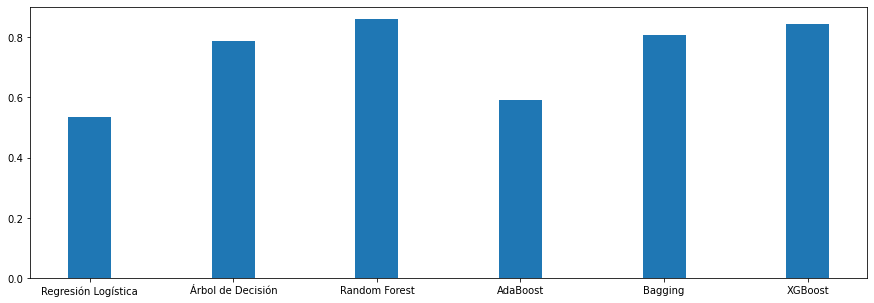

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_acc, width=0.3)

## Parte 2

### Análisis de Resultados

Ahora usted utilizará la función `classication_report` para determinar qué clasificador se ajusta más a los resultados buscados, teniendo en cuenta el contexto del problema y la simplicidad de cada modelo.

### Random Forest

In [ ]:
from sklearn.metrics import classification_report

y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       229
           1       0.88      0.84      0.86       251

    accuracy                           0.86       480
   macro avg       0.86      0.86      0.86       480
weighted avg       0.86      0.86      0.86       480



### Árbol de Decisión

In [ ]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       229
           1       0.78      0.82      0.80       251

    accuracy                           0.79       480
   macro avg       0.79      0.78      0.78       480
weighted avg       0.79      0.79      0.78       480



### XGBoost

In [ ]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       229
           1       0.83      0.88      0.85       251

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



### Bagging de Árboles de Decisión

In [ ]:
y_pred_bagging = bagging.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       229
           1       0.82      0.81      0.81       251

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



## Conclusiones

Concluya a partir de los resultados obtenidos y la documentación leída sobre los métodos utilizados y las diferencias entre sus distintos rendimientos.


Grid search es el proceso de realizar un ajuste de hiperparámetros para determinar los valores óptimos para un modelo dado. Con Grid Search, se probaron todas las combinaciones posibles de los parámetros de interés y se encontraron los mejores. Para esto, se pasaron valores predefinidos para hiperparámetros a la función GridSearchCV definiendo un diccionario en el que se mencionó un hiperparámetro en particular junto con los valores que puede tomar. Por otro lado, RandomizedSearchCV es útil cuando se tienen muchos parámetros para probar y el tiempo de entrenamiento es muy largo.

Los mejores parámetros encontrados en el caso del árbol de decisión son el criterio: entropy, max_depth: 22 y min_samples_leaf: 6. Estos son los que usan para la parte 1B en bagging y boosting. En esta parte, al observar los resultados preliminares se observa que los modelos se organizan de la siguiente manera Random Forest, XGBoost, Bagging, Arbol de Decisión, Ada Boost y Regresión Logística. Siendo el primero el mayor valor obtenido en precisión con 86%. 

Para la segunda parte se observa que con las métricas desplegadas el mejor modelo continúa siendo Random Forest. El valor de F1 es el más cercano a 1. Recall al ser la relación entre verdaderos positivos y la suma de verdaderos positivos y falsos negativos también mantiene los valores por encima del 0.84. 

Un modelo Random Forest está formado por un conjunto (ensemble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales mediante bootstrapping. Esto implica que cada árbol se entrena con unos datos ligeramente distintos. En cada árbol individual, las observaciones se van distribuyendo por bifurcaciones (nodos) generando la estructura del árbol hasta alcanzar un nodo terminal. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.
